In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
"""Reading the simulations"""

import matplotlib.pyplot as plt 
import numpy as np
import pynbody


s=pynbody.load('/srv/cosmdatc/clues/B64_WM3_186592/LG/GAS_SFR/4096_Gasoline/1024/WMAP3.CLUES.HR.001024')
h = s.halos()

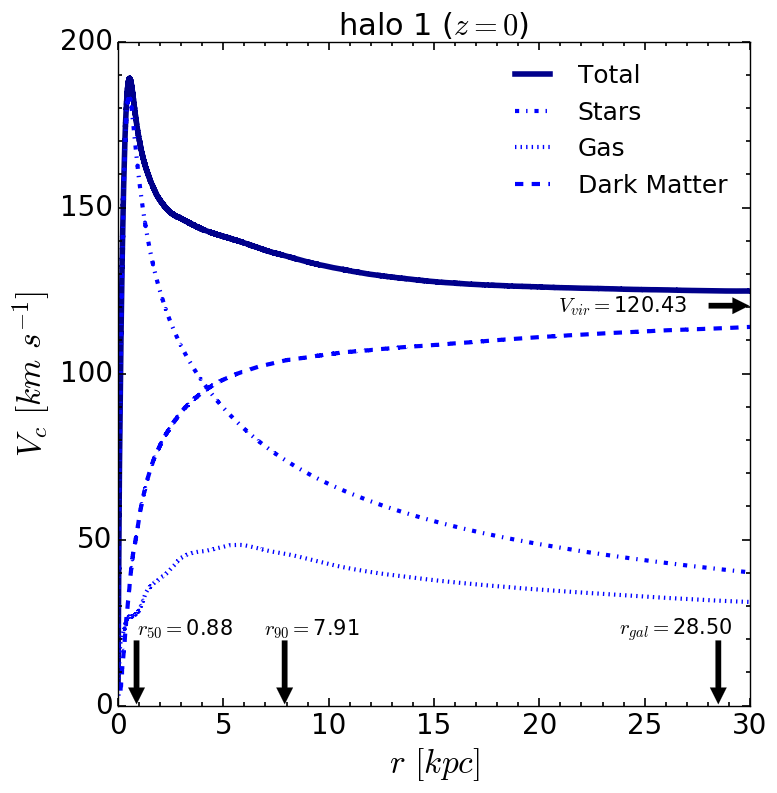

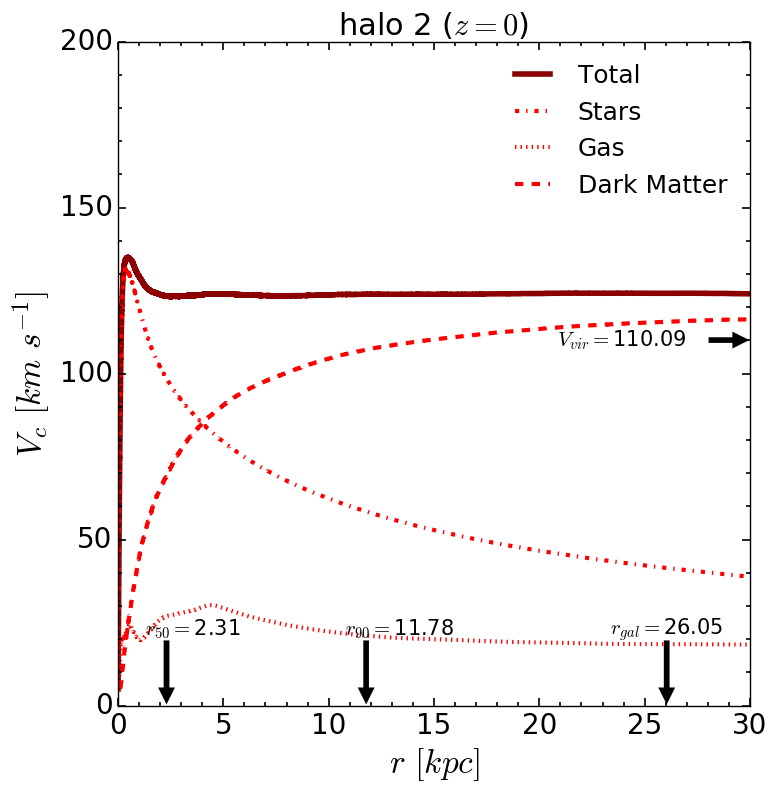

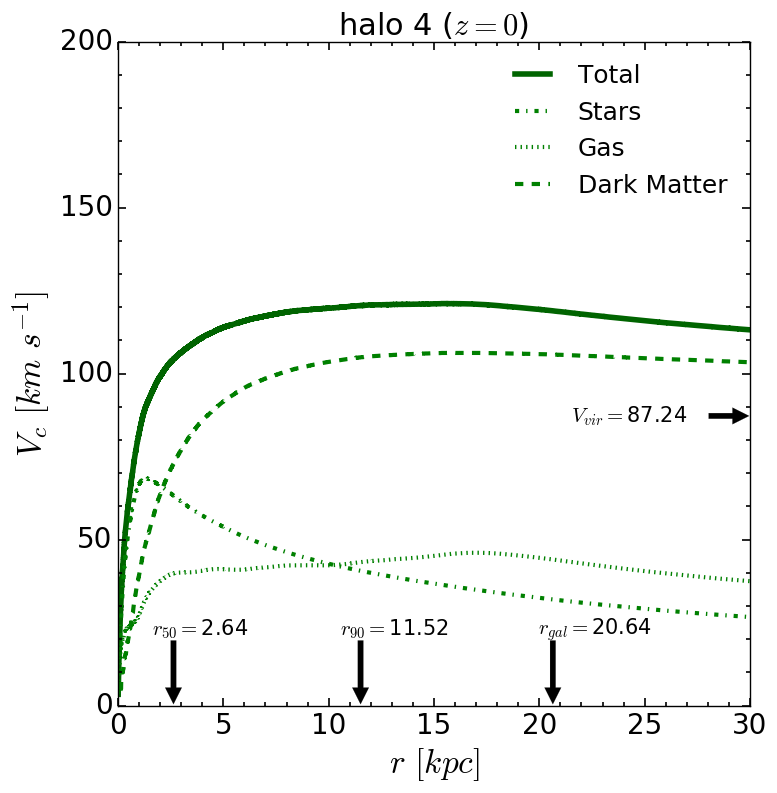

In [3]:
'''PYNBODY'''
#Graficamos la veloc circular pero con la flecha de V200 y solo para los 3 halos mas grandes
import matplotlib.pyplot as plt
import rotation as rot
import sphviewer as sph
import numpy as np

vector = (1,2,4)
vector2 = ('b', 'r', 'g')
vector3 = ('darkblue', 'darkred', 'darkgreen')
hh =0.732
G = 4.299e-6
r200 = (189.977454324, 173.656484976, 137.617865798)

for i in range(0,3):
    h1 = h[vector[i]]
    
    cen_pot = pynbody.analysis.halo.center(h1,mode='pot',retcen=True)

    xstr=(h1.star['pos'].in_units('kpc'))[:,0] - (cen_pot.in_units('kpc'))[0]
    ystr=(h1.star['pos'].in_units('kpc'))[:,1] - (cen_pot.in_units('kpc'))[1]
    zstr=(h1.star['pos'].in_units('kpc'))[:,2] - (cen_pot.in_units('kpc'))[2]
    r = np.sqrt(xstr**2+ystr**2+zstr**2)    
        
    xgas=(h1.gas['pos'].in_units('kpc'))[:,0] - (cen_pot.in_units('kpc'))[0]
    ygas=(h1.gas['pos'].in_units('kpc'))[:,1] - (cen_pot.in_units('kpc'))[1]
    zgas=(h1.gas['pos'].in_units('kpc'))[:,2] - (cen_pot.in_units('kpc'))[2]
    rgas = np.sqrt(xgas**2+ygas**2+zgas**2)
        
    xdrk=(h1.dm['pos'].in_units('kpc'))[:,0] - (cen_pot.in_units('kpc'))[0]
    ydrk=(h1.dm['pos'].in_units('kpc'))[:,1] - (cen_pot.in_units('kpc'))[1]
    zdrk=(h1.dm['pos'].in_units('kpc'))[:,2] - (cen_pot.in_units('kpc'))[2]
    rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

    m_str = h1.star['mass'].in_units('Msol')
    m_gas = h1.gas['mass'].in_units('Msol')
    m_drk = h1.dm['mass'].in_units('Msol')
        
    rgal=0.15*r200[i]
        
    limit = np.where(r<rgal)
    r_sort = np.sort(r[limit])
    r_indice = np.argsort(r[limit])
        
    limit_str = np.where(r<r200[i])
    rstr_sort = np.sort(r[limit_str])
    rstr_indice = np.argsort(r[limit_str])
      
    limit_gas = np.where(rgas<r200[i])
    rgas_sort = np.sort(rgas[limit_gas])
    rgas_indice = np.argsort(rgas[limit_gas])
        
    limit_drk = np.where(rdrk<r200[i])
    rdrk_sort = np.sort(rdrk[limit_drk])
    rdrk_indice = np.argsort(rdrk[limit_drk])
        
        
    Mgal_str = cumsum((m_str[limit])[r_indice])
        
    Mc_str = cumsum((m_str[limit_str])[rstr_indice])
        
    Mc_gas = cumsum((m_gas[limit_gas])[rgas_indice])
        
    Mc_drk = cumsum((m_drk[limit_drk])[rdrk_indice])
        
#------------------ calculamos r90, r50------------------------------------------
    M_gal = Mgal_str[-1]
    
    razon = Mgal_str/M_gal
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)
        
    r90 = r_sort[noventa]
    r50 = r_sort[cincuenta]
#--------------------------------------------------------------       
    rtot= concatenate([r,rgas,rdrk])
    mtot= concatenate([m_str, m_gas, m_drk])
        
    limit_tot = np.where(rtot<r200[i])
    rtot_sort = np.sort(rtot[limit_tot])
    rtot_indice = np.argsort(rtot[limit_tot])
        
    Mc_tot = cumsum((mtot[limit_tot])[rtot_indice])
#--------------------------------------------------------------   
    Mc_tot = Mc_tot[1:]
    Mc_str = Mc_str[1:]
    Mc_gas = Mc_gas[1:]
    Mc_drk = Mc_drk[1:]
    
    rtot_sort = rtot_sort[1:]
    rstr_sort = rstr_sort[1:]
    rgas_sort = rgas_sort[1:]
    rdrk_sort = rdrk_sort[1:]
    
    Vtot = np.sqrt((G*Mc_tot)/rtot_sort)
    Vstr = np.sqrt((G*Mc_str)/rstr_sort)
    Vgas = np.sqrt((G*Mc_gas)/rgas_sort)
    Vdrk = np.sqrt((G*Mc_drk)/rdrk_sort)
                  
    Vvir = Vtot[-1]

#----------------------------------------------------------------------------------
    fig=plt.figure(i,figsize=(8,8))
    fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
    ax=fig.add_subplot(111)
    total,= ax.plot(rtot_sort,Vtot,'-', lw=4, color='%s'%vector3[i], label= 'Total')
    stars,= ax.plot(rstr_sort,Vstr,'-.',lw=3, color='%s'%vector2[i], label ='Stars')
    gas,= ax.plot(rgas_sort,Vgas,':', color ='%s'%vector2[i],lw=3, label='Gas')
    drk,= ax.plot(rdrk_sort,Vdrk,'--',color='%s'%vector2[i], lw=3, label='Dark Matter')
    ax.set_title('halo '+str('%s'%vector[i])+' ($z = 0$)', fontsize= 22)
    plt.legend(handles=[total,stars,gas,drk],fontsize=18, frameon=False)
    plt.xlabel(u'$r$ $[kpc]$', fontsize=24)
    plt.ylabel(u'$V_c$ $[km$ $s^{-1}]$', fontsize=24)
    plt.ylim(0,200)
    plt.xlim(0,30)
    ax.minorticks_on()
    ax.tick_params( labelsize=20)
    ax.tick_params('both', length=3, width=1.2,which='minor')
    ax.tick_params('both', length=6, width=1.2,which='major')
    
    if i == 0:
        plt.annotate('', xy=(r50[-1],0), xytext=(r50[-1], 20), textcoords='data', 
                    arrowprops=dict(facecolor='black', shrink=0.02, lw=0.1))
        plt.text(r50[-1], 23, '$r_{50} =$'+ '%.2f'%r50[-1], fontsize=15, color='black', ha='left', va='center')
    
    else:    
        plt.annotate('', xy=(r50[-1],0), xytext=(r50[-1], 20), textcoords='data', 
                    arrowprops=dict(facecolor='black', shrink=0.02, lw=0.1))
        plt.text(r50[-1]-1, 23, '$r_{50} =$'+ '%.2f'%r50[-1], fontsize=15, color='black', ha='left', va='center')
    
    plt.annotate('', xy=(30,Vvir), xytext=(28, Vvir), textcoords='data', 
                arrowprops=dict(facecolor='black', shrink=0.02, lw=0.1),ha="left", va='center')
    plt.text(27, Vvir, '$V_{vir} =$'+ str('%.2f'%Vvir), fontsize=15, color='black', ha='right', va='center')
    
    plt.annotate('', xy=(r90[-1],0), xytext=(r90[-1], 20), textcoords='data', 
                arrowprops=dict(facecolor='black', shrink=0.02, lw=0.1))
    plt.text(r90[-1]-1, 23, '$r_{90} =$'+ '%.2f'%r90[-1], fontsize=15, color='black', ha='left', va='center')
    
    plt.annotate('', xy=(rgal,0), xytext=(rgal, 20), textcoords='data', 
                arrowprops=dict(facecolor='black', shrink=0.02, lw=0.1))
    
    if i == 2:
        plt.text(rgal+2, 23, '$r_{gal} =$'+ str('%.2f'%rgal), fontsize=15, color='black', ha='center', va='center') 
    elif i == 1:
        plt.text(rgal, 23, '$r_{gal} =$'+ str('%.2f'%rgal), fontsize=15, color='black', ha='center', va='center')
    else:
        plt.text(rgal-2, 23, '$r_{gal} =$'+ str('%.2f'%rgal), fontsize=15, color='black', ha='center', va='center')

    plt.show()


r200= 166.840000002 Mvir= 5.92979e+11 r50= 0.867003


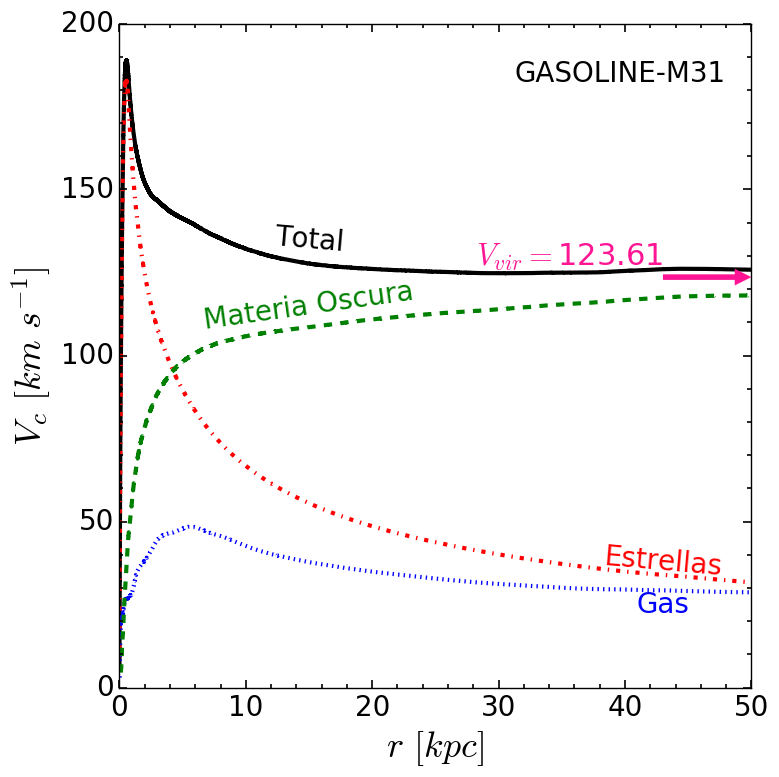

r200= 150.460000002 Mvir= 4.58975e+11 r50= 2.23918


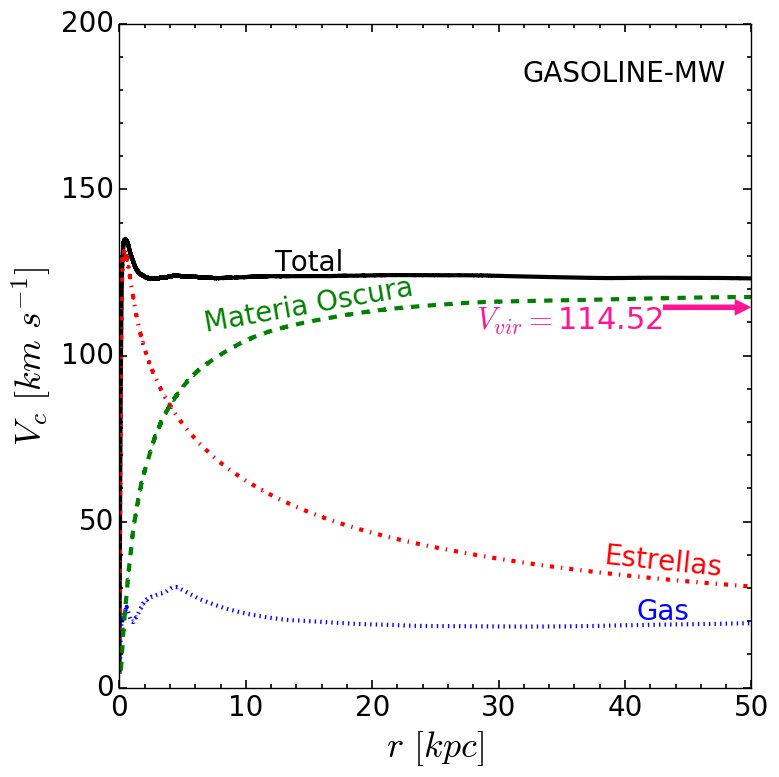

r200= 119.620000002 Mvir= 2.27561e+11 r50= 2.58009


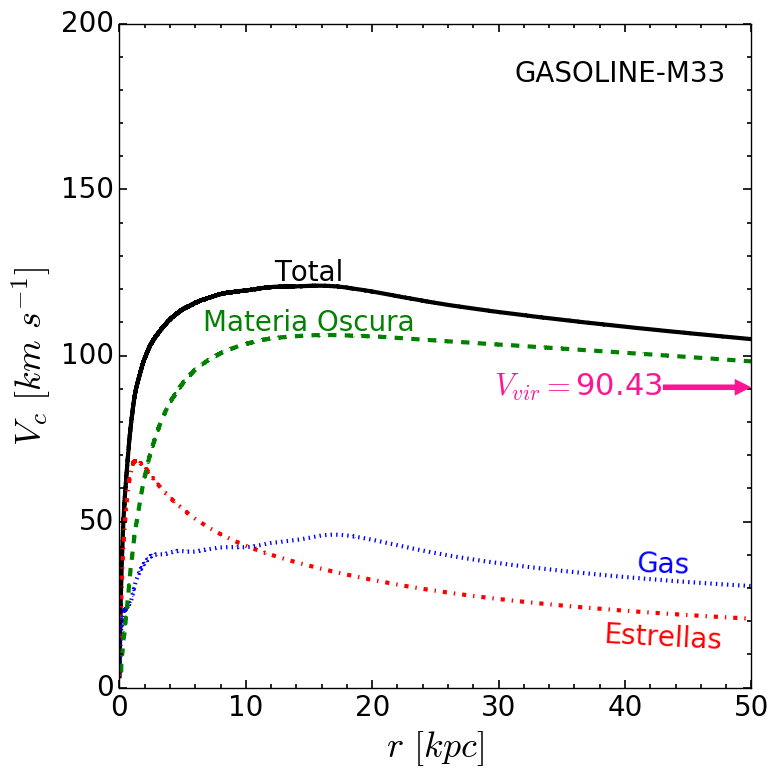

In [4]:
#Graficamos la veloc circular pero con la flecha de V200 y solo para los 3 halos mas grandes
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import sphviewer as sph
import numpy as np

vector = (1,2,4)
vector2 = ('b', 'r', 'g')
vector3 = ('darkblue', 'darkred', 'darkgreen')
vector4 = ('M31', 'MW', 'M33')
G = 4.299e-6
a0 =1.
snapshot = np.loadtxt('/z/dalgorry/snapshots.txt', dtype='string')


snap = h5py.File('../outputs2/snap_1024.h5py', 'r')

for i in range(0,3):
    cm   = snap['subhalo_00'+ str('%s' %vector[i])+ '/Center'].value
    r200 = snap['subhalo_00'+ str('%s' %vector[i])+ '/R200'].value
    aexp = snap['subhalo_00'+ str('%s' %vector[i])+ '/aexp'].value
    h = snap['subhalo_00'+ str('%s' %vector[i])+ '/h'].value
    omega_lambda = snap['subhalo_00'+ str('%s' %vector[i])+ '/OmegaL0'].value
    omega_matter = snap['subhalo_00'+ str('%s' %vector[i])+ '/OmegaM0'].value

    pstr = snap['subhalo_00'+ str('%s'%vector[i]) + '/Str/Coordinates'].value
    masa_str = snap['subhalo_00'+ str('%s' %vector[i]) + '/Str/Masses'].value
    vel  = snap['subhalo_00'+ str('%s' %vector[i])+ '/Str/Velocities'].value

    pgas = snap['subhalo_00'+ str('%s' %vector[i])+ '/Gas/Coordinates'].value
    masa_gas = snap['subhalo_00'+ str('%s' %vector[i])+ '/Gas/Masses'].value

    pdrk = snap['subhalo_00'+ str('%s' %vector[i]) + '/Drk/Coordinates'].value
    masa_drk = snap['subhalo_00'+ str('%s' %vector[i])+ '/Drk/Masses'].value

    H0 = h*100
    z = a0/aexp - 1.
    omega0 = omega_lambda + omega_matter
    Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)

#---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0]-cm[0]) #*aexp
    ystr = (pstr[:,1]-cm[1])
    zstr = (pstr[:,2]-cm[2])
    r = np.sqrt(xstr**2+ystr**2+zstr**2)

    xgas = (pgas[:,0]-cm[0])
    ygas = (pgas[:,1]-cm[1])
    zgas = (pgas[:,2]-cm[2])
    rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

    xdrk = (pdrk[:,0]-cm[0])
    ydrk = (pdrk[:,1]-cm[1])
    zdrk = (pdrk[:,2]-cm[2])
    rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

    #v_x = vel[:,0] *np.sqrt(aexp) + Ht *xstr/1000.
    #v_y = vel[:,1] *np.sqrt(aexp) + Ht *ystr/1000.
    #v_z = vel[:,2] *np.sqrt(aexp) + Ht *zstr/1000.
    
    v_x = vel[:,0] 
    v_y = vel[:,1] 
    v_z = vel[:,2]

#------------------------------------------------
    r200 = r200*aexp
    rgal=0.15*r200

    limit = np.where(r<rgal)
    r_sort = np.sort(r[limit])
    r_indice = np.argsort(r[limit])

    limit_str = np.where(r<r200)
    rstr_sort = np.sort(r[limit_str])
    rstr_indice = np.argsort(r[limit_str])

    limit_gas = np.where(rgas<r200)
    rgas_sort = np.sort(rgas[limit_gas])
    rgas_indice = np.argsort(rgas[limit_gas])

    limit_drk = np.where(rdrk<r200)
    rdrk_sort = np.sort(rdrk[limit_drk])
    rdrk_indice = np.argsort(rdrk[limit_drk])


    Mgal_str = cumsum((masa_str[limit])[r_indice])

    Mc_str = cumsum((masa_str[limit_str])[rstr_indice])

    Mc_gas = cumsum((masa_gas[limit_gas])[rgas_indice])

    Mc_drk = cumsum((masa_drk[limit_drk])[rdrk_indice])

#------------------ calculamos r90, r50------------------------------------------
    M_gal = Mgal_str[-1]

    razon = Mgal_str/M_gal
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa]
    r50 = r_sort[cincuenta]
#--------------------------------------------------------------       
    rtot= concatenate([r,rgas,rdrk])
    mtot= concatenate([masa_str, masa_gas, masa_drk])

    limit_tot = np.where(rtot<r200)
    rtot_sort = np.sort(rtot[limit_tot])
    #rtot_sort1 = np.sort(rtot)
    rtot_indice = np.argsort(rtot[limit_tot])
    #rtot_indice1 = np.argsort(rtot)

    Mc_tot = cumsum((mtot[limit_tot])[rtot_indice])
    #Mc_tot1 = cumsum((mtot[rtot_indice1]))

#calculo rvir------------------------------------------
    '''rho_crit=3*(H0/1000)**2/(8*pi*G)
    rho=Mc_tot1*3/(4*pi*rtot_sort1**3)
    delta=rho/rho_crit
    kk=np.where(delta<200)
    rvir=rtot_sort1[kk]
    print rvir[0],(delta[kk])[0]'''
#--------------------------------------------------------------
    Mc_tot = Mc_tot[1:]
    Mc_str = Mc_str[1:]
    Mc_gas = Mc_gas[1:]
    Mc_drk = Mc_drk[1:]

    rtot_sort = rtot_sort[1:]
    rstr_sort = rstr_sort[1:]
    rgas_sort = rgas_sort[1:]
    rdrk_sort = rdrk_sort[1:]

    Vtot = np.sqrt((G*Mc_tot)/rtot_sort)
    Vstr = np.sqrt((G*Mc_str)/rstr_sort)
    Vgas = np.sqrt((G*Mc_gas)/rgas_sort)
    Vdrk = np.sqrt((G*Mc_drk)/rdrk_sort)

    Vvir = Vtot[-1]
    
    print 'r200=',r200, 'Mvir=', Mc_tot[-1], 'r50=', r50[-1]
    
    #print Mc_tot[-1]/(4/3.*pi*rtor_sort[-1])
    
#-----------------------------------------------------------------------------------
    fig=plt.figure(i,figsize=(8,8))
    fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
    ax=fig.add_subplot(111)
    total,= ax.plot(rtot_sort,Vtot,'-', lw=3, color='k', label= 'Total')
    stars,= ax.plot(rstr_sort,Vstr,'-.',lw=3, color='r', label ='Stars')
    gas,= ax.plot(rgas_sort,Vgas,':', color ='b',lw=3, label='Gas')
    drk,= ax.plot(rdrk_sort,Vdrk,'--',color='g', lw=3, label='Dark Matter')
    #ax.set_title('Gasoline - '+ '%s'%vector4[i]+' ($z = 0$)', fontsize= 20)
    plt.text(48, 185, 'GASOLINE-'+'%s'%vector4[i], fontsize=20, color='black', ha='right', va='center')
    #plt.legend(handles=[total,stars,gas,drk],fontsize=18, frameon=False)
    plt.xlabel(u'$r$ $[kpc]$', fontsize=26)
    plt.ylabel(u'$V_c$ $[km$ $s^{-1}]$', fontsize=26)
    plt.ylim(0,200)
    plt.xlim(0,50)
    ax.minorticks_on()
    ax.tick_params( labelsize=20)
    ax.tick_params('both', length=3, width=1.2,which='minor')
    ax.tick_params('both', length=6, width=1.2,which='major')

    if i == 0:
        '''plt.annotate('', xy=(r50[-1],0), xytext=(r50[-1], 27), textcoords='data',
                     fontsize=18,arrowprops=dict(facecolor='black', shrink=0.02, lw=0.01))
        plt.text(1.5, 32, '$r_{50} =$'+ str('%.2f'%r50[-1]), fontsize=20, color='black', 
                 ha='left', va='center')
        #plt.annotate('$r_{90} =$'+ '%.2f'%r90[-1], xy=(r90[-1],0), xytext=(0, +90), textcoords='offset points', 
        #             fontsize=18,arrowprops=dict(facecolor='black', shrink=0.02, lw=0.1),ha="center")'''
        #plt.annotate('', xy=(rgal,0), xytext=(rgal, 27), textcoords='data', 
        #             fontsize=18,arrowprops=dict(facecolor='black', shrink=0.02, lw=0.01),ha="center")
        #plt.text(rgal, 32, '$r_{gal} =$'+ str('%.2f'%rgal), fontsize=20, color='black', 
        #         ha='center', va='center')
        plt.annotate('', xy=(50,Vvir), xytext=(43, Vvir), textcoords='data', ha="right", va='center',
                     arrowprops=dict(facecolor='deeppink', ec="none"))
        plt.text(43, Vvir+6,  u'$V_{vir} =$'+ str('%.2f'%Vvir), fontsize=22, color='deeppink', 
                     ha='right', va='center')
        plt.text(43, 25, 'Gas', fontsize=20, color='b', ha='center', va='center')
        plt.text(43, 38, 'Estrellas', fontsize=20, color='r', ha='center', va='center',rotation= -5)
        plt.text(15, 115, 'Materia Oscura', fontsize=20, color='g', ha='center', va='center', rotation= 8)
        plt.text(15, 135, 'Total', fontsize=20, color='black', ha='center', va='center',rotation= -5)
    elif i ==1:
        '''plt.annotate('', xy=(r50[-1],0), xytext=(r50[-1], 27), textcoords='data',
                     fontsize=18,arrowprops=dict(facecolor='black', shrink=0.02, lw=0.01))
        plt.text(1.5, 32, '$r_{50} =$'+ str('%.2f'%r50[-1]), fontsize=20, color='black', 
                 ha='left', va='center')
        #plt.annotate('$r_{90} =$'+ '%.2f'%r90[-1], xy=(r90[-1],0), xytext=(0, +90), textcoords='offset points', 
        #             fontsize=18,arrowprops=dict(facecolor='black', shrink=0.02, lw=0.1),ha="center")'''
        #plt.annotate('', xy=(rgal,0), xytext=(rgal, 27), textcoords='data', 
        #             fontsize=18,arrowprops=dict(facecolor='black', shrink=0.02, lw=0.01),ha="center")
        #plt.text(rgal, 32, '$r_{gal} =$'+ str('%.2f'%rgal), fontsize=20, color='black', 
        #         ha='center', va='center')
        plt.annotate('', xy=(50,Vvir), xytext=(43, Vvir), textcoords='data', ha="right", va='center',
                     arrowprops=dict(facecolor='deeppink', ec="none"))
        plt.text(43, Vvir-4,  u'$V_{vir} =$'+ str('%.2f'%Vvir), fontsize=22, color='deeppink', 
                     ha='right', va='center')
        plt.text(43, 23, 'Gas', fontsize=20, color='b', ha='center', va='center')
        plt.text(43, 38, 'Estrellas', fontsize=20, color='r', ha='center', va='center', rotation= -6)
        plt.text(15, 115, 'Materia Oscura', fontsize=20, color='g', ha='center', va='center',rotation= 10)
        plt.text(15, 128, 'Total', fontsize=20, color='black', ha='center', va='center')
    else:
        '''plt.annotate('', xy=(r50[-1],0), xytext=(r50[-1], 27), textcoords='data',
                     fontsize=18,arrowprops=dict(facecolor='black', shrink=0.02, lw=0.01))
        plt.text(1.5, 32, '$r_{50} =$'+ str('%.2f'%r50[-1]), fontsize=20, color='black', 
                 ha='left', va='center')
        #plt.annotate('$r_{90} =$'+ '%.2f'%r90[-1], xy=(r90[-1],0), xytext=(0, +80), textcoords='offset points', 
        #             fontsize=18,arrowprops=dict(facecolor='black', shrink=0.02, lw=0.1),ha="center")'''
        #plt.annotate('', xy=(rgal,0), xytext=(rgal, 27), textcoords='data', 
        #             fontsize=18,arrowprops=dict(facecolor='black', shrink=0.02, lw=0.01),ha="center")
        #plt.text(rgal, 32, '$r_{gal} =$'+ str('%.2f'%rgal), fontsize=20, color='black', 
        #         ha='center', va='center')
        plt.annotate('', xy=(50,Vvir), xytext=(43, Vvir), textcoords='data', ha="right", va='center',
                     arrowprops=dict(facecolor='deeppink', ec="none"))
        plt.text(43, Vvir,  u'$V_{vir} =$'+ str('%.2f'%Vvir), fontsize=22, color='deeppink', 
                ha='right', va='center')
        plt.text(43, 37, 'Gas', fontsize=20, color='b', ha='center', va='center',rotation= -2)
        plt.text(43, 15, 'Estrellas', fontsize=20, color='r', ha='center', va='center',rotation= -3)
        plt.text(15, 110, 'Materia Oscura', fontsize=20, color='g', ha='center', va='center')
        plt.text(15, 125, 'Total', fontsize=20, color='black', ha='center', va='center')
       
    fig.savefig('/z/dalgorry/plots/final/GS_'+str('%s'%vector4[i])+'-Vc.png', dpi = 100)
    plt.show()


In [3]:
print masa_str, masa_gas, masa_drk

[ 14348.59375     14348.59375     14348.59375    ...,  20191.72265625
  20191.72265625  20191.72265625] [ 60625.44921875  60625.44921875  60625.44921875 ...,  40650.3515625
  60625.44921875  60625.44921875] [ 287463.21875  287463.21875  287463.21875 ...,  287463.21875  287463.21875
  287463.21875]
